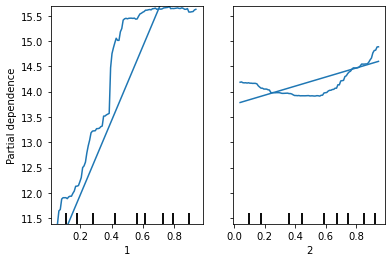

In [3]:
from sklearn.inspection import plot_partial_dependence
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
X, y = make_friedman1()
est1 = LinearRegression().fit(X, y)
est2 = RandomForestRegressor().fit(X, y)
disp1 = plot_partial_dependence(est1, X,
                                [1, 2])  
disp2 = plot_partial_dependence(est2, X, [1, 2],
                                ax=disp1.axes_)  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence

diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor()
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(100, 100),
                                 tol=1e-2, max_iter=500, random_state=0))
tree.fit(X, y)
mlp.fit(X, y)


StandardScaler()
MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=0,
             tol=0.01)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X, ["age", "bmi"], ax=ax)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X, ["age", "bmi"], ax=ax,
                                   line_kw={"color": "red"})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron",
                                      "color": "red"})
ax1.legend()
ax2.legend()